In [1]:
import pandas as pd
import csv

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#needed
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

f = open('thermal-dataset.csv','w')
writer = csv.writer(f)

    
df = pd.read_csv (r'/Users/kailenking/Downloads/homework4/thermal-dataset.csv')

df = df.drop(columns =['Name', 'y-theory' , 'y-exp'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(df)



,V,M,n,np,B,G,E,v,H,B',G',_,vL,vS,va,_e,_el,_es,_e.1,A
0,11.41,24.022,2,2,431.745,518.249,1110.439,7.134e-02,95.902,-1.046e+02,-85.597,3.496,17.921,12.175,13.277,1755.800,0.945,0.776,0.836,7.830e-07
1,73.73,236.570,2,2,36.824,14.518,38.495,3.258e-01,3.220,-1.944e+00,0.304,5.328,3.247,1.651,1.850,131.347,0.843,-0.940,0.909,9.570e-07
2,47.34,144.350,2,2,56.319,29.018,74.294,2.801e-01,6.603,-4.242e+00,-0.265,5.063,4.332,2.394,2.667,219.524,0.978,0.049,0.566,3.080e-07
3,24.74,41.988,2,2,52.412,36.328,88.529,2.185e-01,10.654,-7.083e+00,-3.811,2.818,5.982,3.590,3.972,405.800,1.325,1.131,1.199,1.860e-06
4,40.97,56.170,2,2,90.001,63.410,154.051,2.147e-01,15.043,-7.522e+00,-1.509,2.277,8.756,5.278,5.836,503.980,0.952,0.321,0.609,3.660e-07
5,50.92,228.563,3,3,99.110,75.020,179.716,1.978e-01,18.051,-1.331e+01,-3.959,7.454,5.169,3.173,3.502,281.263,2.210,1.177,1.597,3.710e-06
6,227.56,900.012,12,3,46.339,40.113,93.391,1.641e-01,14.643,-6.288e-01,-0.473,6.561,3.901,2.473,2.720,210.526,1.268,1.174,1.206,1.890e-06
7,125.96,240.576,12,12,212.562,187.444,434.588,1.592e-01,36.877,-4.938e+00,-1.660,3.172,12.076,7.688,8.451,501.955,0.807,0.391,0.565,3.060e-07
8,28.08,50.026,4,4,209.486,155.782,374.512,2.020e-01,27.111,-2.155e+01,-7.025,2.958,11.875,7.257,8.013,784.880,0.874,0.467,0.632,4.010e-07
9,21.00,40.096,2,2,212.057,193.395,444.928,1.503e-01,39.065,-2.962e+01,-11.947,3.171,12.174,7.810,8.578,925.709,0.851,0.482,0.630,3.970e-07


In [2]:
# To give equal importance to all features, we need to scale the continuous features  #to normalize dataset
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
pd.DataFrame(data_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000,0.003,0.0,0.0,0.994,0.989,0.991,0.143,0.904,0.000,0.000,0.185,0.994,0.993,0.993,1.000,0.137,0.588,0.008,3.814e-05
1,0.063,0.044,0.0,0.0,0.068,0.027,0.033,0.658,0.030,0.764,0.698,0.312,0.103,0.111,0.113,0.061,0.135,0.573,0.009,4.856e-05
2,0.037,0.026,0.0,0.0,0.114,0.055,0.065,0.566,0.062,0.747,0.693,0.294,0.168,0.173,0.176,0.112,0.138,0.581,0.003,9.701e-06
3,0.014,0.007,0.0,0.0,0.104,0.069,0.078,0.441,0.100,0.726,0.664,0.138,0.269,0.273,0.277,0.220,0.144,0.591,0.015,1.026e-04
4,0.030,0.009,0.0,0.0,0.193,0.120,0.137,0.434,0.142,0.723,0.683,0.101,0.437,0.415,0.420,0.276,0.137,0.584,0.004,1.317e-05


In [3]:
km = KMeans(n_clusters=3)
km = km.fit(data_transformed) #fit to normalized dataset
km.inertia_ #Sum of squared distances of samples to their closest cluster center
km.cluster_centers_
km.labels_



array([1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,

In [4]:
Sum_of_squared_distances = []
K = range(1,7)
for k in K: #how to pick the best k
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)# 

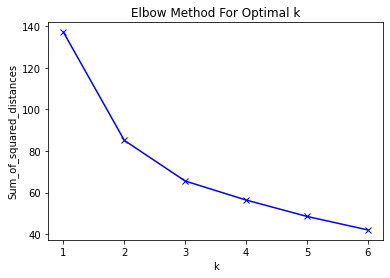

In [5]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#best K is at the elbow position.  K=5.

In [6]:
n_clusters=10 ######why is 5 optimal?
km = KMeans(n_clusters=10)
km = km.fit(data_transformed)
km.inertia_ #Sum of squared distances of samples to their closest cluster center
km.cluster_centers_
km.labels_
cluster_labels=km.labels_

In [7]:
#want to draw the cluster labels at cluster center using openTSNE

#from openTSNE import TSNE as OTSNE #to do dimension reduction
#x_train=df
#tsne = OTSNE(
 #   perplexity=30,
  #  metric="euclidean",
   # n_jobs=8,
    #random_state=42,
 #   verbose=True,
#)
#embedding_train = tsne.fit(x_train)
#X=embedding_train
reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans( n_clusters=10, n_init=4)
kmeans.fit(reduced_data)


KMeans(n_clusters=10, n_init=4)

Computing embedding
Done.
ward :	0.04s
average :	0.00s
complete :	0.00s
single :	0.00s


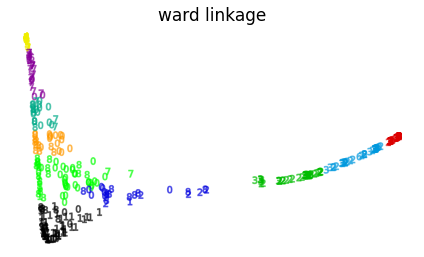

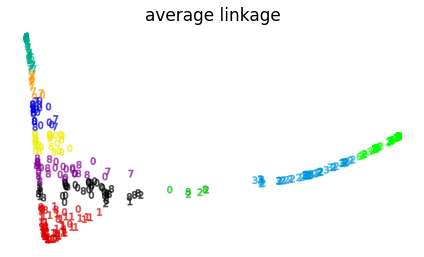

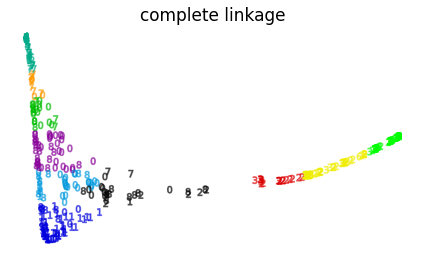

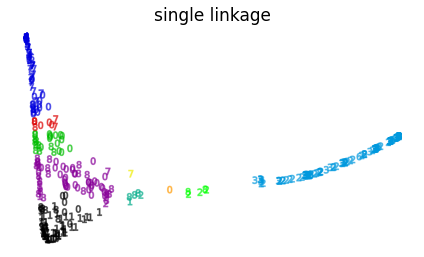

In [8]:
from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

#digits = datasets.load_digits()
#X, y = digits.data, digits.target
#n_samples, n_features = X.shape

#np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in range(0,n_clusters):
        plt.scatter(
            *X_red[km.labels_ == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[km.labels_ == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(reduced_data)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()
